# 1. 背景介绍

微信的使用人群极大，每个人的微信里面加了无数的好友，尝试了解一下自己的好友

1. 学习 itchat 的使用

2. 学习用户数据的一般性分析

3. 脱敏

In [11]:
import itchat
# 登陆验证
itchat.auto_login(hotReload=True)

执行后，弹出二维码，扫描验证，登陆。

登陆成功，获取好友现象

In [12]:
friends = itchat.get_friends(update=True)

In [13]:
from collections import defaultdict

friends_dict = defaultdict(list)

for friend in friends:
    friends_dict["NickName"].append(friend["NickName"])
    friends_dict["Sex"].append(friend["Sex"])
    friends_dict["Province"].append(friend["Province"])
    friends_dict["City"].append(friend["City"])
    friends_dict["Signature"].append(friend["Signature"])
    friends_dict["RemarkName"].append(friend["RemarkName"])

In [15]:
import pandas as pd

df = pd.DataFrame(friends_dict)
df.shape

(274, 6)

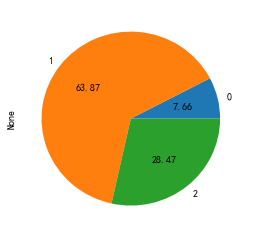

In [16]:
%matplotlib inline
df.groupby("Sex").size().plot.pie(figsize=(4,4), autopct="%.2f")

In [17]:
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["SimHei"] # 用正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False # 用来正常显示负号

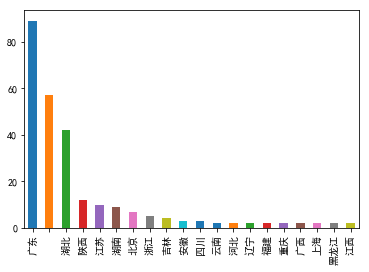

In [18]:
df.Province.value_counts()[:20].plot.bar()

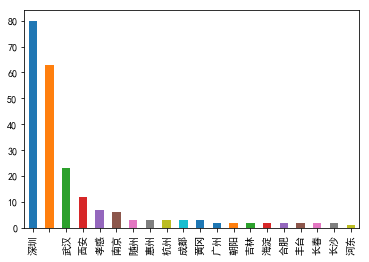

In [19]:
df.City.value_counts()[:20].plot.bar()

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Morgan\AppData\Local\Temp\jieba.cache
Loading model cost 1.078 seconds.
Prefix dict has been built succesfully.


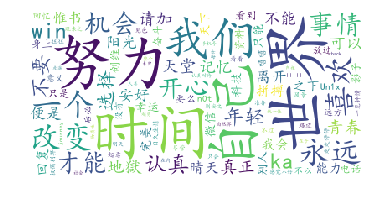

LOG OUT!
LOG OUT!
LOG OUT!
LOG OUT!


In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import jieba
import matplotlib.pyplot as plt

# 替换签名中的那些表情
signs = df.Signature.str.replace("<.*?>", "", )
# 将分词后的结果以空格连接
words = " ".join(jieba.cut(signs.str.cat(sep=" ")))
# 设置停用词
stopwords = STOPWORDS

wc = WordCloud(stopwords=stopwords,
              font_path="C:/Windows/Fonts/simkai.ttf",
              background_color="white", max_words=100)

my_wc = wc.generate_from_text(words)

plt.imshow(my_wc)
plt.axis("off")
plt.show()